In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import random
import os
import seaborn as sns
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

print(tf.__version__)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

2.9.1
Num GPUs Available:  1


In [17]:
LR = 5e-4
batch_size = 6
epochs = 70
patience = 30
dropout = 0.7
model_name = f'model3_lab_6_lr{LR:.0e}_b{batch_size}_do{dropout}'
model_name = 'test'

dataset_dir = 'apartment'

input_shape = (30, 30, 3)
num_classes = 3
model = tf.keras.Sequential(
    [
        tf.keras.Input(shape=input_shape),
        layers.Conv2D(16, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(16, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(8, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
        
        layers.Flatten(),
        layers.Dense(16, activation='relu'),
        layers.Dropout(dropout),
        layers.Dense(8, activation='relu'),
        layers.Dropout(dropout),
        layers.Dense(num_classes, activation='softmax'),
    ]
)
model.summary()
model.compile(optimizer=tf.keras.optimizers.Adam(LR),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 30, 30, 16)        448       
                                                                 
 batch_normalization_10 (Bat  (None, 30, 30, 16)       64        
 chNormalization)                                                
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 15, 15, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 15, 15, 16)        2320      
                                                                 
 batch_normalization_11 (Bat  (None, 15, 15, 16)       64        
 chNormalization)                                                
                                                      

In [18]:
train_generator = ImageDataGenerator(
        rotation_range=360,
        height_shift_range=0.5,
        width_shift_range=0.5,
        shear_range=70,
        brightness_range=(0.5, 1),
        zoom_range=[0.6, 1],
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='reflect',
        rescale=1./255,
)

valid_generator = ImageDataGenerator(
        rotation_range=360,
        brightness_range=(0.5, 1),
        zoom_range=[0.6, 1],
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='reflect',
        rescale=1./255,
)

train_flow = train_generator.flow_from_directory(
        batch_size=batch_size,
        directory=f'{dataset_dir}/train',
        shuffle=True,
        target_size=input_shape[:-1],
    )

valid_flow = valid_generator.flow_from_directory(
        batch_size=batch_size,
        directory=f'{dataset_dir}/valid',
        shuffle=True,
        target_size=input_shape[:-1],
    )

test_flow = valid_generator.flow_from_directory(
        batch_size=batch_size,
        directory=f'{dataset_dir}/test',
        shuffle=False,
        target_size=input_shape[:-1],
    )

Found 240 images belonging to 3 classes.
Found 42 images belonging to 3 classes.
Found 45 images belonging to 3 classes.


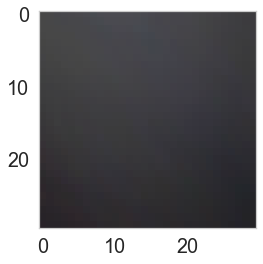

In [19]:
sns.set_style("whitegrid", {'axes.grid' : False})
for _ in range(5):
    img, label = train_flow.next()
    #print(img.shape)   #  (1,256,256,3)
    plt.imshow(img[0])
    #plt.imsave('augment.jpg', img[0])

In [20]:
STEP_SIZE_TRAIN=train_flow.n//train_flow.batch_size
STEP_SIZE_VALID=valid_flow.n//valid_flow.batch_size

checkpoint = tf.keras.callbacks.ModelCheckpoint(f'trained_models/{model_name}', save_best_only=True)
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience)
history = model.fit(train_flow,
            steps_per_epoch=STEP_SIZE_TRAIN,
            validation_data=valid_flow,
            validation_steps=STEP_SIZE_VALID,
            epochs=epochs,
            callbacks=[stop_early, checkpoint],
)

Epoch 1/70
39/40 [============================>.] - ETA: 0s - loss: 1.3353 - accuracy: 0.2564

INFO:tensorflow:Assets written to: trained_models\test\assets


INFO:tensorflow:Assets written to: trained_models\test\assets


40/40 [==============================] - 4s 64ms/step - loss: 1.3299 - accuracy: 0.2542 - val_loss: 1.1028 - val_accuracy: 0.3095
Epoch 2/70
40/40 [==============================] - ETA: 0s - loss: 1.0748 - accuracy: 0.3750

INFO:tensorflow:Assets written to: trained_models\test\assets


INFO:tensorflow:Assets written to: trained_models\test\assets


40/40 [==============================] - 2s 59ms/step - loss: 1.0748 - accuracy: 0.3750 - val_loss: 1.0970 - val_accuracy: 0.3571
Epoch 3/70
37/40 [==========================>...] - ETA: 0s - loss: 1.0846 - accuracy: 0.3694

INFO:tensorflow:Assets written to: trained_models\test\assets


INFO:tensorflow:Assets written to: trained_models\test\assets


40/40 [==============================] - 3s 64ms/step - loss: 1.0966 - accuracy: 0.3708 - val_loss: 1.0827 - val_accuracy: 0.4762
Epoch 4/70
40/40 [==============================] - 1s 15ms/step - loss: 1.1173 - accuracy: 0.3583 - val_loss: 1.0908 - val_accuracy: 0.3810
Epoch 5/70
40/40 [==============================] - 1s 14ms/step - loss: 1.1111 - accuracy: 0.3917 - val_loss: 1.0904 - val_accuracy: 0.3810
Epoch 6/70
36/40 [==========================>...] - ETA: 0s - loss: 1.1061 - accuracy: 0.3287

INFO:tensorflow:Assets written to: trained_models\test\assets


INFO:tensorflow:Assets written to: trained_models\test\assets


40/40 [==============================] - 2s 58ms/step - loss: 1.1046 - accuracy: 0.3417 - val_loss: 1.0775 - val_accuracy: 0.5714
Epoch 7/70
39/40 [============================>.] - ETA: 0s - loss: 1.0749 - accuracy: 0.3675

INFO:tensorflow:Assets written to: trained_models\test\assets


INFO:tensorflow:Assets written to: trained_models\test\assets


40/40 [==============================] - 2s 59ms/step - loss: 1.0753 - accuracy: 0.3667 - val_loss: 1.0693 - val_accuracy: 0.5000
Epoch 8/70
39/40 [============================>.] - ETA: 0s - loss: 1.0799 - accuracy: 0.3675

INFO:tensorflow:Assets written to: trained_models\test\assets


INFO:tensorflow:Assets written to: trained_models\test\assets


40/40 [==============================] - 2s 63ms/step - loss: 1.0806 - accuracy: 0.3583 - val_loss: 1.0656 - val_accuracy: 0.5000
Epoch 9/70
40/40 [==============================] - 1s 18ms/step - loss: 1.0854 - accuracy: 0.3250 - val_loss: 1.0816 - val_accuracy: 0.4524
Epoch 10/70
40/40 [==============================] - 1s 15ms/step - loss: 1.0605 - accuracy: 0.3708 - val_loss: 1.0659 - val_accuracy: 0.3810
Epoch 11/70
40/40 [==============================] - 1s 14ms/step - loss: 1.1076 - accuracy: 0.3667 - val_loss: 1.0707 - val_accuracy: 0.4524
Epoch 12/70
39/40 [============================>.] - ETA: 0s - loss: 1.0889 - accuracy: 0.3761

INFO:tensorflow:Assets written to: trained_models\test\assets


INFO:tensorflow:Assets written to: trained_models\test\assets


40/40 [==============================] - 2s 59ms/step - loss: 1.0885 - accuracy: 0.3708 - val_loss: 1.0638 - val_accuracy: 0.5000
Epoch 13/70
36/40 [==========================>...] - ETA: 0s - loss: 1.0779 - accuracy: 0.3843

INFO:tensorflow:Assets written to: trained_models\test\assets


INFO:tensorflow:Assets written to: trained_models\test\assets


40/40 [==============================] - 2s 61ms/step - loss: 1.0780 - accuracy: 0.3750 - val_loss: 1.0416 - val_accuracy: 0.4762
Epoch 14/70
40/40 [==============================] - 1s 15ms/step - loss: 1.0792 - accuracy: 0.3583 - val_loss: 1.0611 - val_accuracy: 0.6429
Epoch 15/70
36/40 [==========================>...] - ETA: 0s - loss: 1.0615 - accuracy: 0.3750

INFO:tensorflow:Assets written to: trained_models\test\assets


INFO:tensorflow:Assets written to: trained_models\test\assets


40/40 [==============================] - 2s 63ms/step - loss: 1.0658 - accuracy: 0.3792 - val_loss: 1.0413 - val_accuracy: 0.7381
Epoch 16/70
40/40 [==============================] - ETA: 0s - loss: 1.0462 - accuracy: 0.3917

INFO:tensorflow:Assets written to: trained_models\test\assets


INFO:tensorflow:Assets written to: trained_models\test\assets


40/40 [==============================] - 2s 60ms/step - loss: 1.0462 - accuracy: 0.3917 - val_loss: 1.0128 - val_accuracy: 0.5714
Epoch 17/70
36/40 [==========================>...] - ETA: 0s - loss: 1.0643 - accuracy: 0.4259

INFO:tensorflow:Assets written to: trained_models\test\assets


INFO:tensorflow:Assets written to: trained_models\test\assets


40/40 [==============================] - 2s 61ms/step - loss: 1.0566 - accuracy: 0.4292 - val_loss: 0.9456 - val_accuracy: 0.6190
Epoch 18/70
40/40 [==============================] - 1s 16ms/step - loss: 1.0728 - accuracy: 0.3917 - val_loss: 0.9483 - val_accuracy: 0.9286
Epoch 19/70
39/40 [============================>.] - ETA: 0s - loss: 0.9986 - accuracy: 0.4444

INFO:tensorflow:Assets written to: trained_models\test\assets


INFO:tensorflow:Assets written to: trained_models\test\assets


40/40 [==============================] - 2s 63ms/step - loss: 1.0010 - accuracy: 0.4375 - val_loss: 0.9352 - val_accuracy: 0.9524
Epoch 20/70
36/40 [==========================>...] - ETA: 0s - loss: 1.0046 - accuracy: 0.4722

INFO:tensorflow:Assets written to: trained_models\test\assets


INFO:tensorflow:Assets written to: trained_models\test\assets


40/40 [==============================] - 2s 59ms/step - loss: 1.0029 - accuracy: 0.4792 - val_loss: 0.8728 - val_accuracy: 0.9524
Epoch 21/70
40/40 [==============================] - 1s 15ms/step - loss: 1.0681 - accuracy: 0.4583 - val_loss: 0.9700 - val_accuracy: 0.8333
Epoch 22/70
40/40 [==============================] - 1s 14ms/step - loss: 1.0389 - accuracy: 0.3583 - val_loss: 0.9167 - val_accuracy: 0.5000
Epoch 23/70
40/40 [==============================] - ETA: 0s - loss: 1.0296 - accuracy: 0.4375

INFO:tensorflow:Assets written to: trained_models\test\assets


INFO:tensorflow:Assets written to: trained_models\test\assets


40/40 [==============================] - 2s 59ms/step - loss: 1.0296 - accuracy: 0.4375 - val_loss: 0.7624 - val_accuracy: 0.8333
Epoch 24/70
38/40 [===========================>..] - ETA: 0s - loss: 0.9820 - accuracy: 0.4518

INFO:tensorflow:Assets written to: trained_models\test\assets


INFO:tensorflow:Assets written to: trained_models\test\assets


40/40 [==============================] - 3s 65ms/step - loss: 0.9722 - accuracy: 0.4542 - val_loss: 0.7477 - val_accuracy: 0.8095
Epoch 25/70
40/40 [==============================] - 1s 16ms/step - loss: 1.0307 - accuracy: 0.4500 - val_loss: 0.8474 - val_accuracy: 0.9048
Epoch 26/70
39/40 [============================>.] - ETA: 0s - loss: 1.0084 - accuracy: 0.4487

INFO:tensorflow:Assets written to: trained_models\test\assets


INFO:tensorflow:Assets written to: trained_models\test\assets


40/40 [==============================] - 2s 59ms/step - loss: 1.0039 - accuracy: 0.4500 - val_loss: 0.7116 - val_accuracy: 0.8333
Epoch 27/70
40/40 [==============================] - 1s 17ms/step - loss: 1.0121 - accuracy: 0.4250 - val_loss: 0.8897 - val_accuracy: 0.8571
Epoch 28/70
40/40 [==============================] - 1s 15ms/step - loss: 0.9783 - accuracy: 0.4625 - val_loss: 0.7545 - val_accuracy: 0.8810
Epoch 29/70
40/40 [==============================] - 1s 15ms/step - loss: 0.9944 - accuracy: 0.4167 - val_loss: 1.0147 - val_accuracy: 0.3571
Epoch 30/70
40/40 [==============================] - 1s 14ms/step - loss: 1.1249 - accuracy: 0.3917 - val_loss: 1.0306 - val_accuracy: 0.6190
Epoch 31/70
40/40 [==============================] - 1s 14ms/step - loss: 1.0249 - accuracy: 0.4000 - val_loss: 0.8276 - val_accuracy: 0.4286
Epoch 32/70
40/40 [==============================] - 1s 14ms/step - loss: 0.9926 - accuracy: 0.4333 - val_loss: 0.7940 - val_accuracy: 0.9524
Epoch 33/70
40/40 

INFO:tensorflow:Assets written to: trained_models\test\assets


INFO:tensorflow:Assets written to: trained_models\test\assets


40/40 [==============================] - 2s 59ms/step - loss: 0.9894 - accuracy: 0.4167 - val_loss: 0.6560 - val_accuracy: 0.9048
Epoch 38/70
40/40 [==============================] - ETA: 0s - loss: 0.9789 - accuracy: 0.4583

INFO:tensorflow:Assets written to: trained_models\test\assets


INFO:tensorflow:Assets written to: trained_models\test\assets


40/40 [==============================] - 3s 65ms/step - loss: 0.9789 - accuracy: 0.4583 - val_loss: 0.6297 - val_accuracy: 0.8333
Epoch 39/70
40/40 [==============================] - 1s 16ms/step - loss: 0.9888 - accuracy: 0.4458 - val_loss: 1.0306 - val_accuracy: 0.4048
Epoch 40/70
40/40 [==============================] - 1s 14ms/step - loss: 1.0822 - accuracy: 0.4042 - val_loss: 2.3035 - val_accuracy: 0.3571
Epoch 41/70
40/40 [==============================] - 1s 14ms/step - loss: 0.9970 - accuracy: 0.4292 - val_loss: 0.8206 - val_accuracy: 0.4286
Epoch 42/70
40/40 [==============================] - 1s 14ms/step - loss: 0.9895 - accuracy: 0.4375 - val_loss: 0.7193 - val_accuracy: 0.6667
Epoch 43/70
40/40 [==============================] - 1s 15ms/step - loss: 1.0320 - accuracy: 0.4208 - val_loss: 0.7342 - val_accuracy: 0.9762
Epoch 44/70
40/40 [==============================] - 1s 15ms/step - loss: 0.9486 - accuracy: 0.5250 - val_loss: 0.7612 - val_accuracy: 0.8571
Epoch 45/70
40/40 

INFO:tensorflow:Assets written to: trained_models\test\assets


INFO:tensorflow:Assets written to: trained_models\test\assets


40/40 [==============================] - 2s 59ms/step - loss: 0.9029 - accuracy: 0.5167 - val_loss: 0.5966 - val_accuracy: 0.8810
Epoch 48/70
40/40 [==============================] - 1s 15ms/step - loss: 1.0671 - accuracy: 0.4208 - val_loss: 0.9104 - val_accuracy: 0.6429
Epoch 49/70
40/40 [==============================] - 1s 14ms/step - loss: 1.0155 - accuracy: 0.4125 - val_loss: 0.7118 - val_accuracy: 0.8571
Epoch 50/70
40/40 [==============================] - 1s 15ms/step - loss: 0.9172 - accuracy: 0.5292 - val_loss: 0.7479 - val_accuracy: 0.4762
Epoch 51/70
40/40 [==============================] - 1s 15ms/step - loss: 0.9770 - accuracy: 0.4333 - val_loss: 1.0618 - val_accuracy: 0.4286
Epoch 52/70
40/40 [==============================] - 1s 14ms/step - loss: 0.9958 - accuracy: 0.4875 - val_loss: 0.6862 - val_accuracy: 0.7143
Epoch 53/70
40/40 [==============================] - 1s 14ms/step - loss: 0.9275 - accuracy: 0.4958 - val_loss: 0.7111 - val_accuracy: 0.6190
Epoch 54/70
40/40 

INFO:tensorflow:Assets written to: trained_models\test\assets


INFO:tensorflow:Assets written to: trained_models\test\assets


40/40 [==============================] - 2s 59ms/step - loss: 0.8742 - accuracy: 0.5417 - val_loss: 0.5389 - val_accuracy: 0.9048
Epoch 58/70
40/40 [==============================] - 1s 15ms/step - loss: 0.9864 - accuracy: 0.4833 - val_loss: 0.8633 - val_accuracy: 0.4762
Epoch 59/70
39/40 [============================>.] - ETA: 0s - loss: 0.9330 - accuracy: 0.5256

INFO:tensorflow:Assets written to: trained_models\test\assets


INFO:tensorflow:Assets written to: trained_models\test\assets


40/40 [==============================] - 2s 59ms/step - loss: 0.9309 - accuracy: 0.5292 - val_loss: 0.5358 - val_accuracy: 0.8810
Epoch 60/70
40/40 [==============================] - 1s 15ms/step - loss: 0.9792 - accuracy: 0.4750 - val_loss: 0.8255 - val_accuracy: 0.5952
Epoch 61/70
40/40 [==============================] - 1s 15ms/step - loss: 0.9640 - accuracy: 0.4833 - val_loss: 0.6605 - val_accuracy: 0.8810
Epoch 62/70
40/40 [==============================] - 1s 15ms/step - loss: 0.8872 - accuracy: 0.5625 - val_loss: 0.7267 - val_accuracy: 0.6667
Epoch 63/70
39/40 [============================>.] - ETA: 0s - loss: 0.8611 - accuracy: 0.5342

INFO:tensorflow:Assets written to: trained_models\test\assets


INFO:tensorflow:Assets written to: trained_models\test\assets


40/40 [==============================] - 3s 64ms/step - loss: 0.8651 - accuracy: 0.5333 - val_loss: 0.5125 - val_accuracy: 0.8571
Epoch 64/70
40/40 [==============================] - 1s 16ms/step - loss: 0.9080 - accuracy: 0.5125 - val_loss: 0.5980 - val_accuracy: 0.9524
Epoch 65/70
40/40 [==============================] - 1s 14ms/step - loss: 0.8813 - accuracy: 0.5708 - val_loss: 0.5322 - val_accuracy: 0.9048
Epoch 66/70
40/40 [==============================] - 1s 14ms/step - loss: 0.9032 - accuracy: 0.5417 - val_loss: 0.9998 - val_accuracy: 0.5000
Epoch 67/70
40/40 [==============================] - 1s 14ms/step - loss: 0.8588 - accuracy: 0.5292 - val_loss: 0.6149 - val_accuracy: 0.8333
Epoch 68/70
40/40 [==============================] - 1s 15ms/step - loss: 0.8460 - accuracy: 0.5833 - val_loss: 0.7315 - val_accuracy: 0.6905
Epoch 69/70
40/40 [==============================] - 1s 14ms/step - loss: 0.8343 - accuracy: 0.6000 - val_loss: 0.7139 - val_accuracy: 0.7143
Epoch 70/70
40/40 

In [21]:
# Save training history
hist_df = pd.DataFrame(history.history) 
hist_csv_file = f'trained_models/{model_name}/history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [22]:
model = tf.keras.models.load_model('trained_models/' + model_name) #model_name

test_flow.reset()

scores = model.evaluate(test_flow)

print("%s%s: %.2f%%" % ("evaluate ", model.metrics_names[1], scores[1]*100))

8/8 [==============================] - 1s 52ms/step - loss: 0.4781 - accuracy: 0.9333
evaluate accuracy: 93.33%


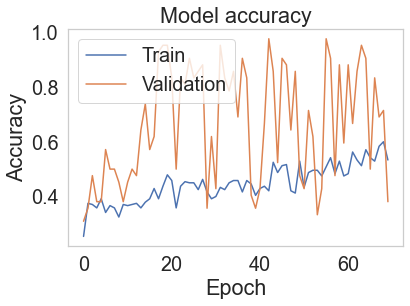

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

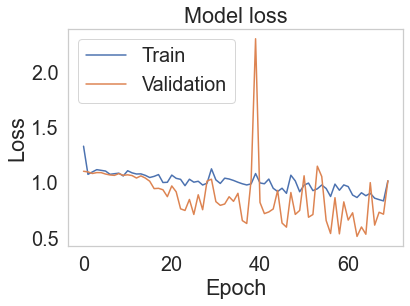

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('loss.png')
plt.show()

In [25]:
raw_datasets = f'{dataset_dir} data'
split_datasets = dataset_dir

CLASSES = []
for subdir in os.listdir(raw_datasets):
    CLASSES.append(subdir)
    
print(CLASSES)
    
index = 1
img_num = 34

TEST_IMAGES = []
TEST_LABELS = []
for subdir in os.listdir(split_datasets + '/test'):
    for file in os.listdir(os.path.join(split_datasets, 'test', subdir)):
        a = np.asarray(Image.open(f'{split_datasets}/test/{subdir}/{file}').resize(input_shape[:-1])).astype(np.float32)/255.
        TEST_IMAGES.append(a)
        TEST_LABELS.append(CLASSES.index(subdir))
        
TEST_IMAGES = np.asarray(TEST_IMAGES)
TEST_LABELS = np.asarray(TEST_LABELS)

img = np.asarray(Image.open(f'{raw_datasets}/{CLASSES[index]}/{img_num}.jpg').resize(input_shape[:-1])).astype(np.float32)/255.
img = np.expand_dims(img, axis=0)
pred = model.predict(img)
print(CLASSES[np.argmax(pred)])

['bedroom floor', 'bedroom table', 'kitchen table']
1/1 [==============================] - 0s 135ms/step
bedroom table


{'bedroom floor': 0, 'bedroom table': 1, 'kitchen table': 2}
2/2 [==============================] - 0s 38ms/step


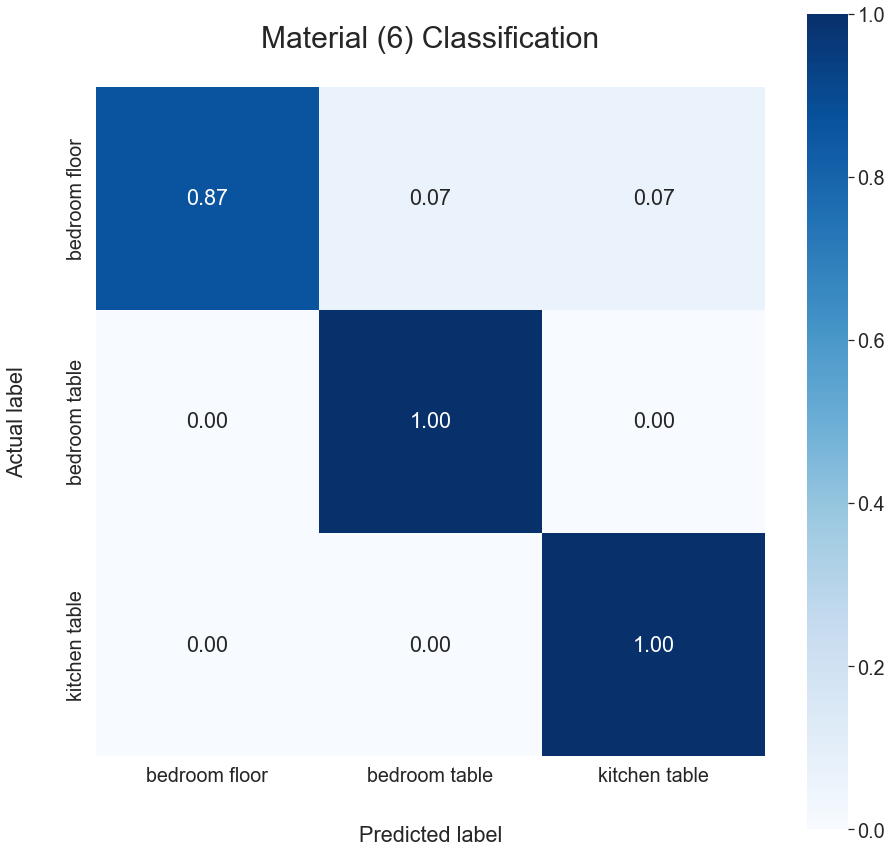

In [26]:
file_name = f'./confusion_matrix/{model_name}/confusion_matrix_{num_classes}class_{model_name}'
title = f'Material (6) Classification'

if not os.path.exists('./confusion_matrix'):
    os.mkdir('./confusion_matrix')

if not os.path.exists(f'./confusion_matrix/{model_name}'):
    os.mkdir(f'./confusion_matrix/{model_name}')

test_labels = test_flow.class_indices
print(test_labels)
predictions = tf.math.argmax(model.predict(TEST_IMAGES), axis=1)
cf = tf.math.confusion_matrix(TEST_LABELS, predictions).numpy()
cf = cf / cf.sum(axis=1)[:, np.newaxis]
df = pd.DataFrame(cf, index=CLASSES, columns=CLASSES)
plt.figure(figsize=(15, 15))
sns.set(font_scale=1.8)
hm = sns.heatmap(df, annot=True, cmap='Blues', square=True, fmt='.2f')
plt.xlabel('Predicted label', labelpad=40)
plt.ylabel('Actual label', labelpad=40)
plt.title(title, y=1.03, pad=20, fontsize=30)
plt.savefig(file_name + '_transparent.png', transparent=True, bbox_inches="tight")
plt.savefig(file_name + '_white.png', transparent=False, facecolor='white', bbox_inches="tight")